<a href="https://colab.research.google.com/github/ragabmousa/Test/blob/master/Joe%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# -*- coding: utf-8 -*-
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# === Load and clean data ===
from google.colab import files
uploaded = files.upload()
''
df = pd.read_excel('Model1_Input.xlsx', sheet_name="Model1_data")
df = df.replace([float('inf'), float('-inf')], pd.NA)
column_headers = list(df.columns)
print(column_headers)
df = df.dropna(subset=['X1', 'X2', 'X3', 'X4', 'X5','X6', 'Y'])

# === Define features and target ===
X = df[['X1', 'X2', 'X3', 'X4', 'X5','X6']]
y = df['Y']

# === Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Train XGBoost model ===
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

# === Evaluate model ===
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Get feature importances from the trained model
importance = xgb_model.feature_importances_
feature_names = X.columns

for name, score in zip(feature_names, importance):
    print(f"{name}: {score:.4f}")

print("📊 Model Evaluation:")
print(f"  • Mean Squared Error (MSE): {mse:.4f}")
print(f"  • R² Score: {r2:.4f}")

# === Save model ===
joblib.dump(xgb_model, "xgb_model.pkl")
print("✅ Model trained and saved as 'xgb_model.pkl'")

Saving Model1_Input.xlsx to Model1_Input (1).xlsx
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:X1: object, X2: object, X3: object, X4: object

# Task
Tell me about this dataset.

Here is all the data you need:
"Model1_Input.xlsx"

## Data loading

### Subtask:
Load the dataset "Model1_Input.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the dataset "Model1_Input.xlsx" into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_excel('Model1_Input.xlsx')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Model1_Input.xlsx' not found.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,X1,X2,X3,X4,X5,X6,Y
0,1,6.780594,0.0065,0.0046,0.0,0.72,7.121911
1,1,7.121911,0.0111,0.0362,0.0,0.72,13.538493
2,1,13.538493,0.0473,0.0169,0.0,0.72,22.181196
3,1,22.181196,0.0642,0.0126,0.0,0.72,27.869967
4,1,27.869967,0.0768,0.0191,0.0,0.72,32.535871


(1514, 7)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its structure and characteristics.


**Reasoning**:
Explore the dataset by examining data types, summary statistics, missing values, data distributions, and initial relationships between features.



In [2]:
# Examine Data Types and Summary Statistics
print("Data Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Assess Data Distribution (Initial - more detailed visualizations will follow)
print("\nValue Counts (Categorical Columns):")
for col in df.select_dtypes(include=['object', 'category']):
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

print("\nInitial Observations on Numerical Distributions:")
for col in df.select_dtypes(include=['number']):
    print(f"\nColumn: {col}")
    # Basic observation (more detailed analysis with histograms, etc. will follow)
    print(f"Range: ({df[col].min()}, {df[col].max()})")

# Investigate Relationships (Initial)
print("\nCorrelation Matrix (Numerical Features):")
correlation_matrix = df.corr()
print(correlation_matrix)
print("\nObservations:")
print("Initial inspection suggests potential relationships between X2 and Y, and other features. Further investigation is needed.")

Data Types:
 X1     object
X2     object
X3     object
X4     object
X5    float64
X6    float64
Y      object
dtype: object

Summary Statistics:
                 X5           X6
count  1498.000000  1502.000000
mean     38.925765     0.751558
std      26.383957     0.148874
min       0.000000     0.000000
25%      28.313804     0.610000
50%      33.404998     0.720000
75%      44.442719     0.980000
max     184.681533     0.980000

Missing Values:
 X1    12
X2    12
X3    12
X4    12
X5    16
X6    12
Y     12
dtype: int64

Value Counts (Categorical Columns):

Column: X1
X1
1        307
16       273
42       261
6        249
20       189
10       152
40        70
xxxxx      1
Name: count, dtype: int64

Column: X2
X2
31.316264    5
29.996731    5
38.686025    4
28.895082    4
33.796330    4
            ..
33.197471    1
32.117157    1
31.799254    1
31.502700    1
38.578804    1
Name: count, Length: 1355, dtype: int64

Column: X3
X3
0.0000    6
0.6012    5
0.7470    5
0.6218    5
0.7367

ValueError: could not convert string to float: 'xxxxx'

**Reasoning**:
The previous code block failed due to a non-numeric value 'xxxxx' in the 'X1' column.  Need to clean this up before proceeding with correlation analysis and further investigation.



In [3]:
# Clean the 'X1' column
df['X1'] = pd.to_numeric(df['X1'], errors='coerce')
# Recalculate summary statistics and correlation after cleaning
print("\nSummary Statistics (after cleaning):\n", df.describe())
print("\nCorrelation Matrix (Numerical Features, after cleaning):")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

print("\nMissing Values (after cleaning):\n", df.isnull().sum())


Summary Statistics (after cleaning):
                 X1           X5           X6
count  1501.000000  1498.000000  1502.000000
mean     16.809460    38.925765     0.751558
std      14.565793    26.383957     0.148874
min       1.000000     0.000000     0.000000
25%       6.000000    28.313804     0.610000
50%      16.000000    33.404998     0.720000
75%      20.000000    44.442719     0.980000
max      42.000000   184.681533     0.980000

Correlation Matrix (Numerical Features, after cleaning):
          X1        X5        X6
X1  1.000000  0.194384  0.126027
X5  0.194384  1.000000  0.335364
X6  0.126027  0.335364  1.000000

Missing Values (after cleaning):
 X1    13
X2    12
X3    12
X4    12
X5    16
X6    12
Y     12
dtype: int64


## Data analysis

### Subtask:
Perform a more in-depth analysis of the data, focusing on numerical and categorical features, and identify potential outliers.


**Reasoning**:
Calculate descriptive statistics for numerical features, identify potential outliers using the IQR method, analyze categorical features, calculate the correlation matrix for numerical features, and explore relationships between numerical and categorical features.



In [4]:
# Numerical Features Analysis
numerical_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
print("Descriptive Statistics for Numerical Features:")
print(df[numerical_features].describe())

# Identify potential outliers using IQR
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nPotential outliers in {col}:")
    print(outliers)


# Categorical Features Analysis (although most appear to be numerical)
categorical_features = ['X1', 'X2', 'X3', 'X4', 'Y'] # Consider X2, X3, X4, Y as categorical for now
for col in categorical_features:
    print(f"\nFrequency of categories in {col}:")
    print(df[col].value_counts())


# Correlation Analysis (Numerical Features)
print("\nCorrelation Matrix for Numerical Features:")
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

# Combined Analysis: Explore relationships between numerical and (potential) categorical features
# Example: Distribution of X5 across different categories of 'Y'
print("\nDistribution of X5 across categories of 'Y':")
print(df.groupby('Y')['X5'].describe())


Descriptive Statistics for Numerical Features:
                X1           X5           X6
count  1501.000000  1498.000000  1502.000000
mean     16.809460    38.925765     0.751558
std      14.565793    26.383957     0.148874
min       1.000000     0.000000     0.000000
25%       6.000000    28.313804     0.610000
50%      16.000000    33.404998     0.720000
75%      20.000000    44.442719     0.980000
max      42.000000   184.681533     0.980000

Potential outliers in X1:
        X1         X2      X3      X4         X5    X6          Y
417   42.0  10.424978  0.0065  0.0046  30.021713  0.72  12.019101
418   42.0  12.019101  0.0111  0.0362  32.676932  0.72  27.030732
419   42.0  27.030732  0.0473  0.0169  44.121413  0.72  32.010255
420   42.0  32.010255  0.0642  0.0126  50.429976  0.72  39.021884
421   42.0  39.021884  0.0768  0.0191  59.759924  0.72   48.65825
...    ...        ...     ...     ...        ...   ...        ...
1085  42.0  86.541067  0.9364  0.0038  41.130430  0.61  85.

TypeError: '<' not supported between instances of 'str' and 'float'

**Reasoning**:
The error message indicates that the comparison operator '<' is being used between a string and a float in the outlier detection part.  The code needs to be modified to handle non-numeric values in the numerical columns properly, probably by excluding them from the calculation or converting them to numeric. The error occurs within the `_quantile` function of NumPy, which is called internally by Pandas when computing quantiles.  The problem is likely that there are still non-numeric values in the columns after the previous cleaning attempts.



In [5]:
# Numerical Features Analysis
numerical_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']
print("Descriptive Statistics for Numerical Features:")
print(df[numerical_features].describe(include='all')) # Describe all columns, including numerical and categorical

# Identify potential outliers using IQR (handle non-numeric values)
for col in numerical_features:
    # Convert the column to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Calculate IQR on numeric part of the data
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers within the numeric part of the data
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nPotential outliers in {col}:")
    print(outliers)

# Categorical Features Analysis (although most appear to be numerical)
categorical_features = ['X1', 'X2', 'X3', 'X4', 'Y']
for col in categorical_features:
    print(f"\nFrequency of categories in {col}:")
    print(df[col].value_counts())

# Correlation Analysis (Numerical Features)
print("\nCorrelation Matrix for Numerical Features:")
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

# Combined Analysis: Explore relationships between numerical and (potential) categorical features
# Example: Distribution of X5 across different categories of 'Y'
print("\nDistribution of X5 across categories of 'Y':")
print(df.groupby('Y')['X5'].describe())

Descriptive Statistics for Numerical Features:
                 X1           X2      X3        X4           X5           X6  \
count   1501.000000  1502.000000  1502.0  1502.000  1498.000000  1502.000000   
unique          NaN  1355.000000  1033.0   564.000          NaN          NaN   
top             NaN    31.316264     0.0     0.003          NaN          NaN   
freq            NaN     5.000000     6.0    28.000          NaN          NaN   
mean      16.809460          NaN     NaN       NaN    38.925765     0.751558   
std       14.565793          NaN     NaN       NaN    26.383957     0.148874   
min        1.000000          NaN     NaN       NaN     0.000000     0.000000   
25%        6.000000          NaN     NaN       NaN    28.313804     0.610000   
50%       16.000000          NaN     NaN       NaN    33.404998     0.720000   
75%       20.000000          NaN     NaN       NaN    44.442719     0.980000   
max       42.000000          NaN     NaN       NaN   184.681533     0.980

## Data visualization

### Subtask:
Visualize the data distributions and relationships between variables.


**Reasoning**:
Visualize the data distributions and relationships between variables using histograms, box plots, bar charts, and a correlation matrix heatmap.



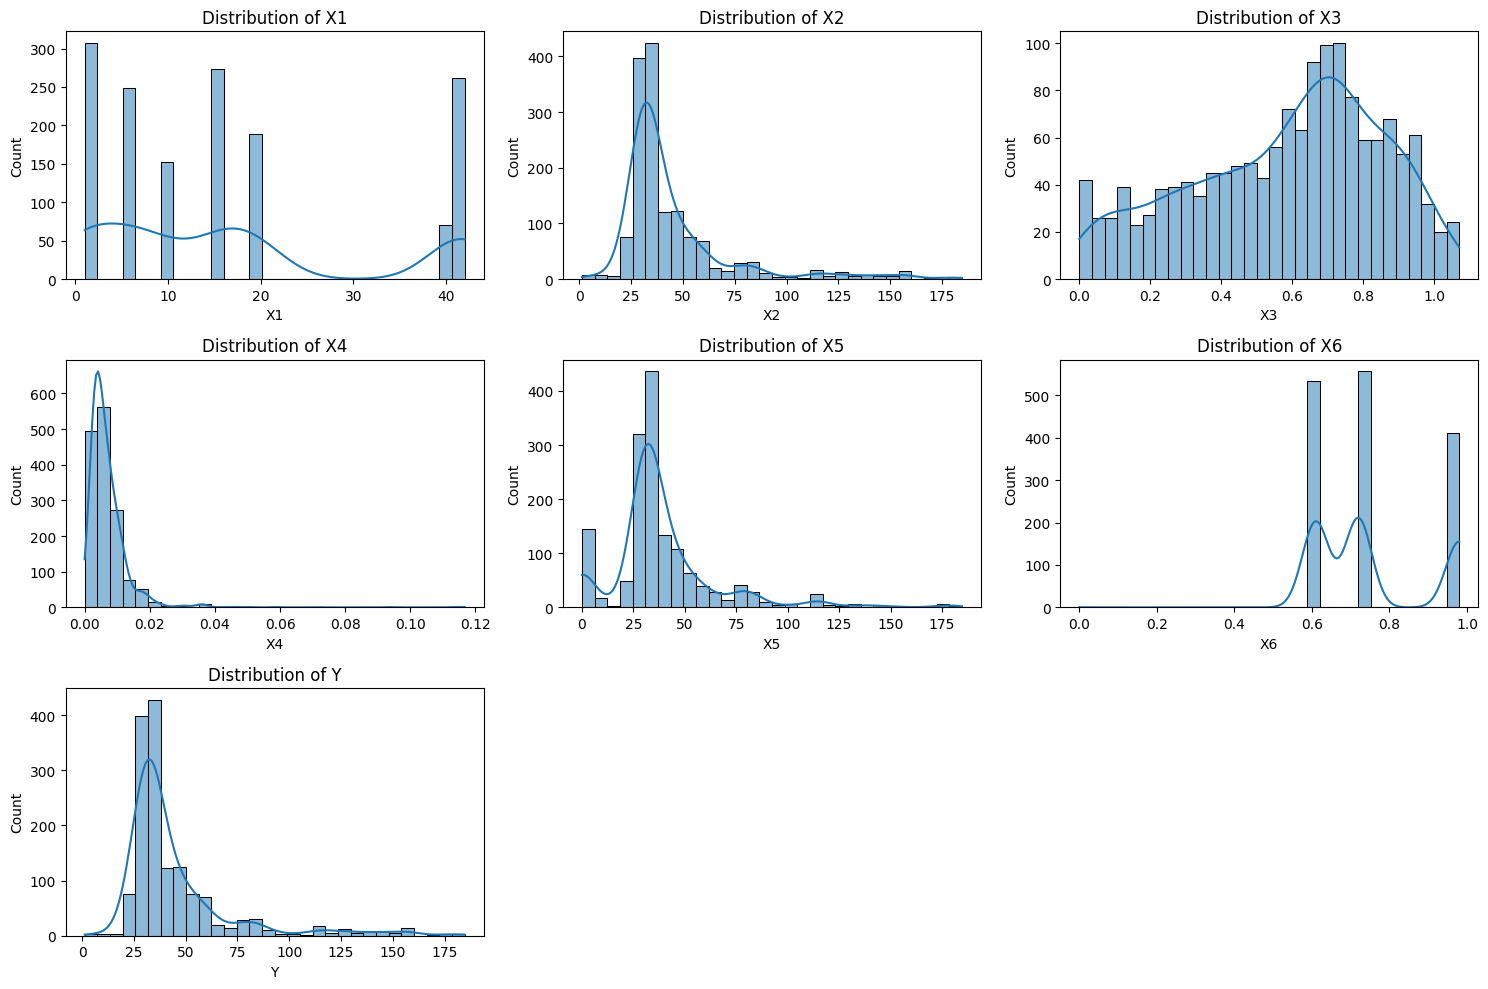

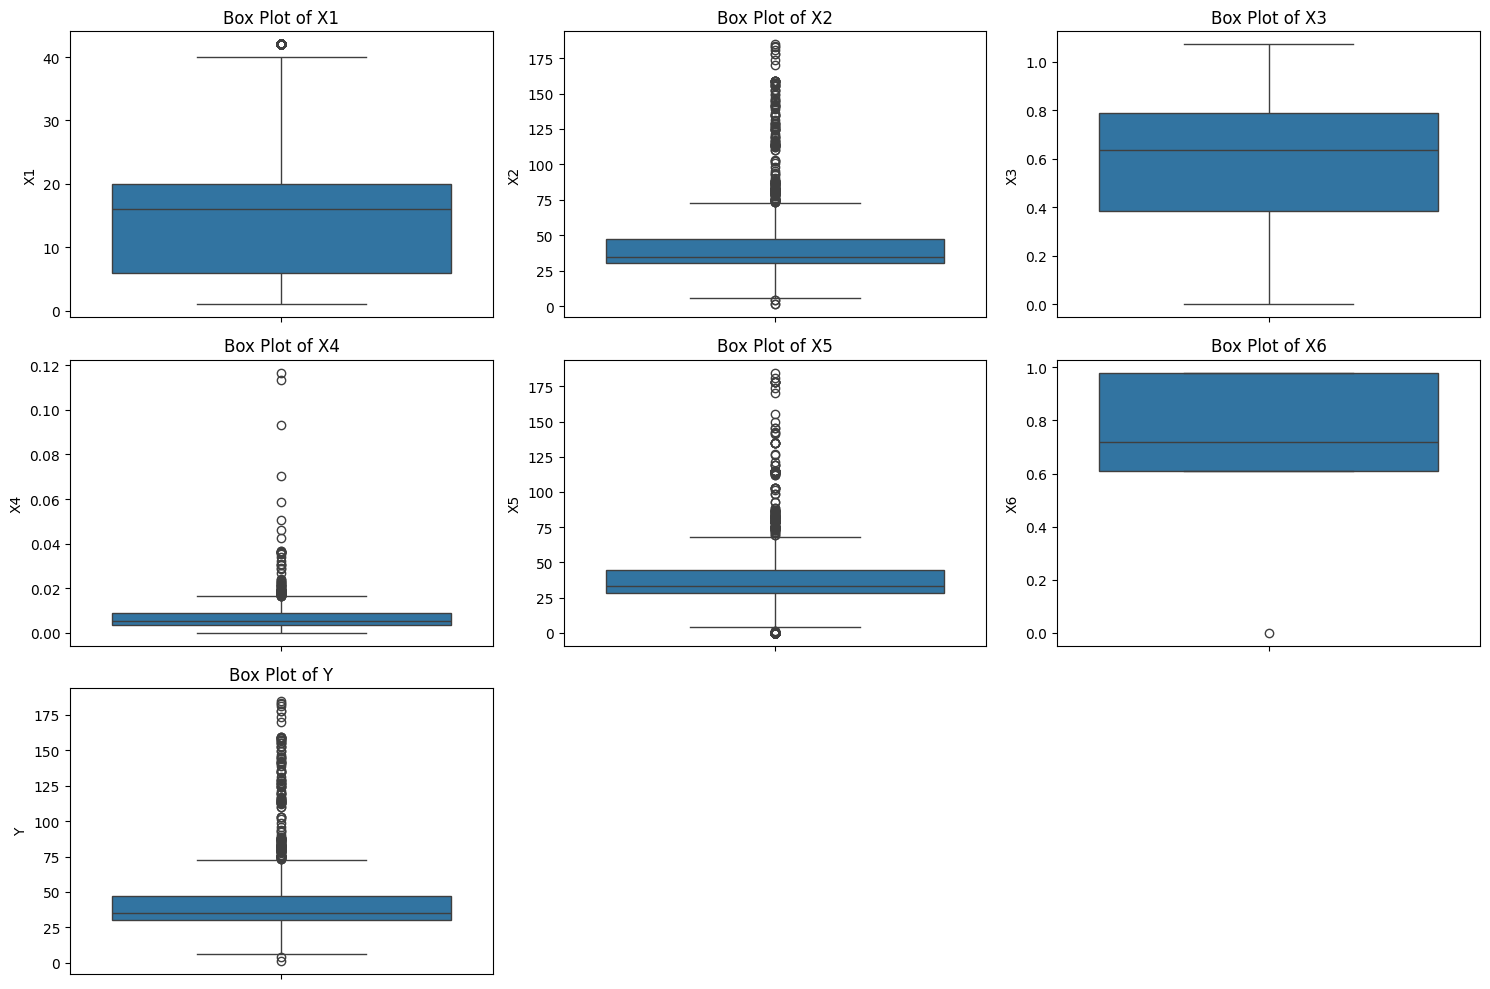

<Figure size 1500x1000 with 0 Axes>

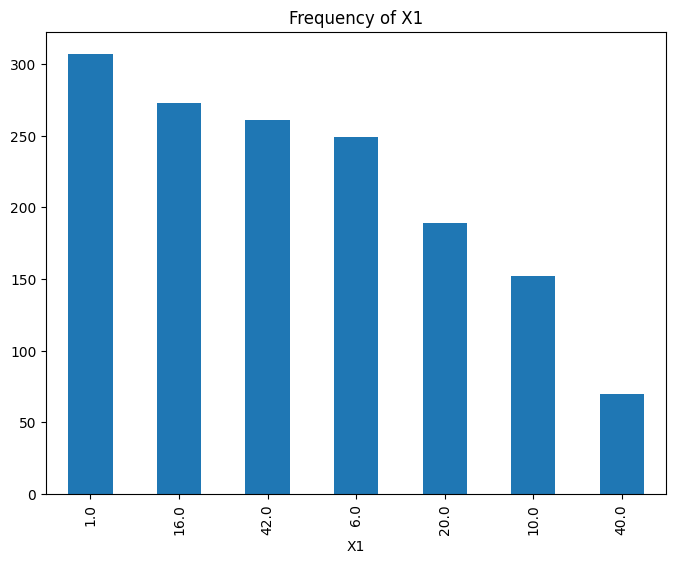

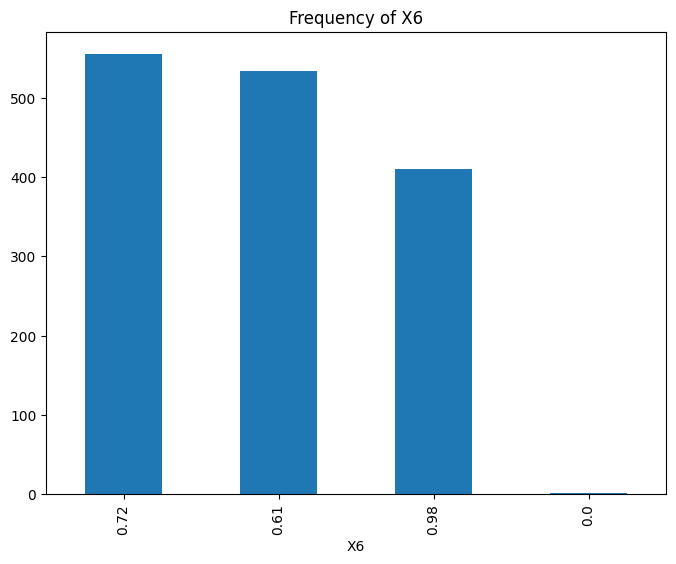

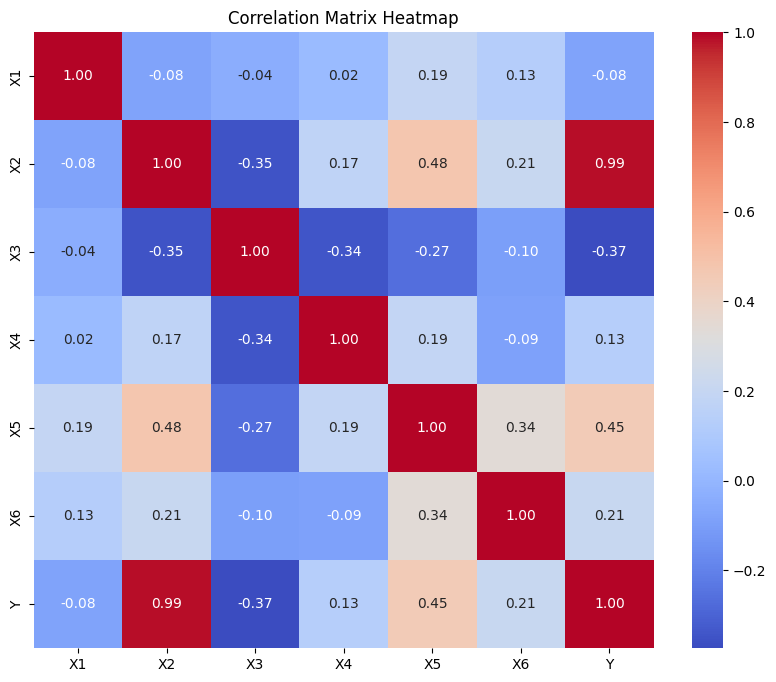

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Bar charts for categorical features (or numerical features with limited unique values)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(exclude=['number']).columns):
    plt.subplot(3, 3, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
plt.tight_layout()
plt.show()

# Numerical features with limited unique values
for col in df.select_dtypes(include=['number']).columns:
    if len(df[col].unique()) <= 10:  # Adjust threshold as needed
        plt.figure(figsize=(8, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Frequency of {col}')
        plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()